In [4]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns

print("Matplotlib version", matplotlib.__version__) #현재 설치된 버전을 출력
#%matplotlib inline  #그래프가 별도의 창이 아닌 노트북 내부에 표시되도록 함
%config InlineBackend.figure_format = 'retina' #그래프 출력 품질을 높임
iris = sns.load_dataset("iris")

Matplotlib version 3.9.2


In [14]:
df_iris = pd.DataFrame(iris)
print("첫 데이터 5개 행\n", df_iris.head())
print("결측값 확인\n", df_iris.isna().sum())
print("데이터 유형 확인\n", df_iris.dtypes)
print(df_iris.info())

첫 데이터 5개 행
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
결측값 확인
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
데이터 유형 확인
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-nu

기본 통계 요약
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Species별 통계량:
             sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


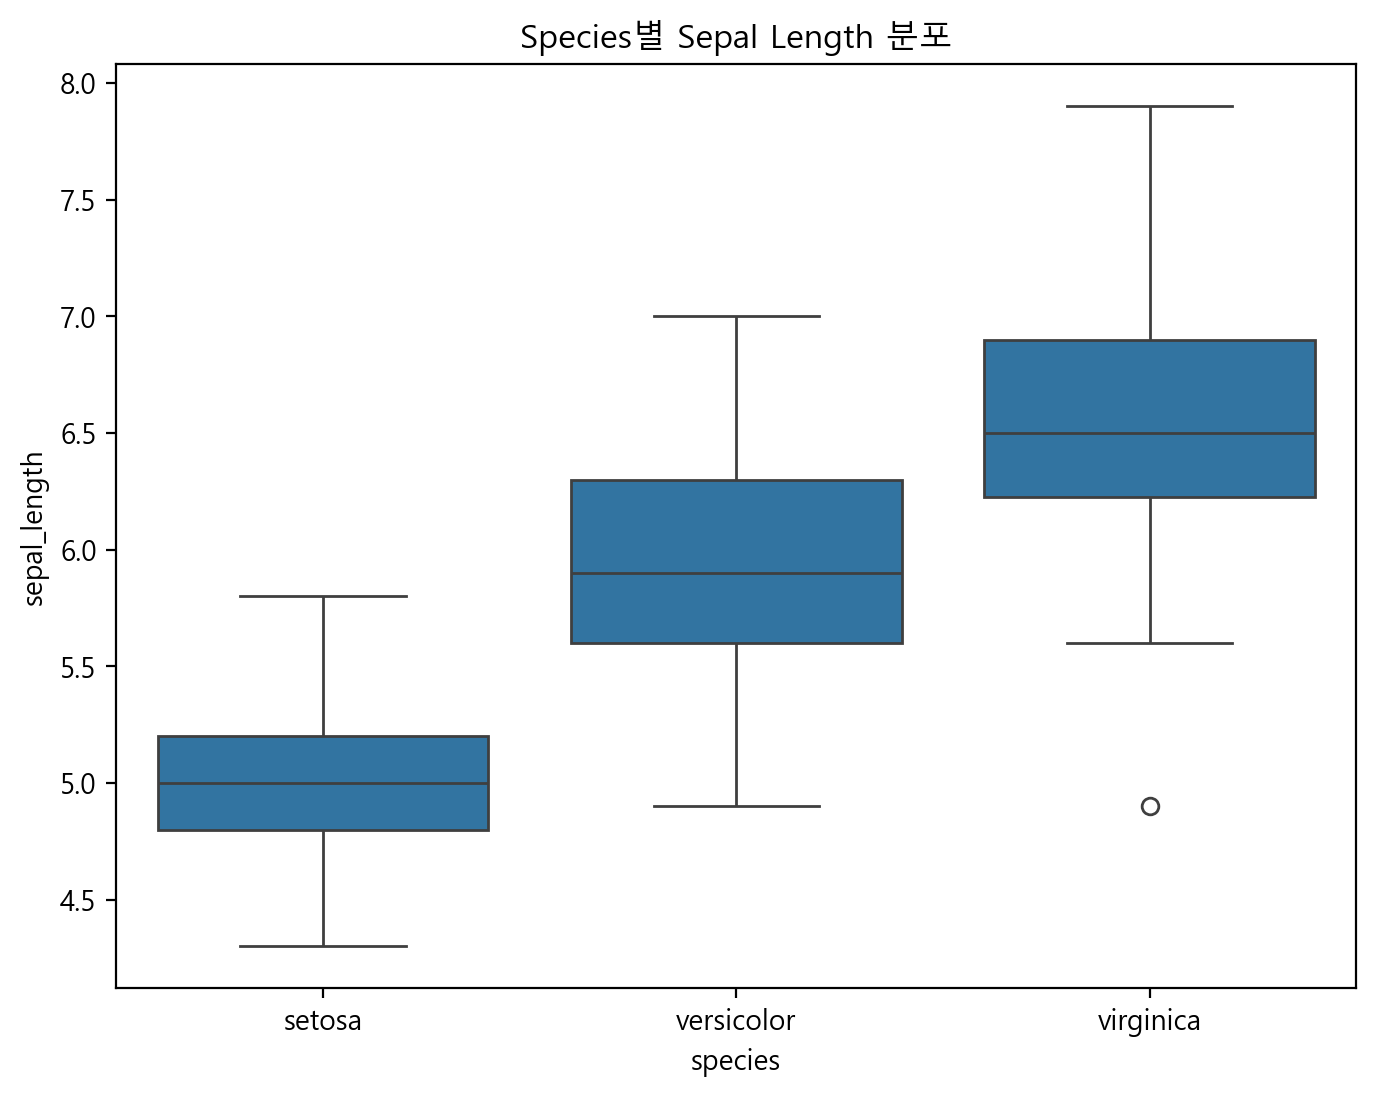

In [19]:
print("기본 통계 요약\n", df_iris.describe())
plt.rcParams['font.family'] = 'Malgun Gothic'  # 예시: Windows의 맑은 고딕 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
print("\nSpecies별 통계량:\n", df_iris.groupby('species').mean())


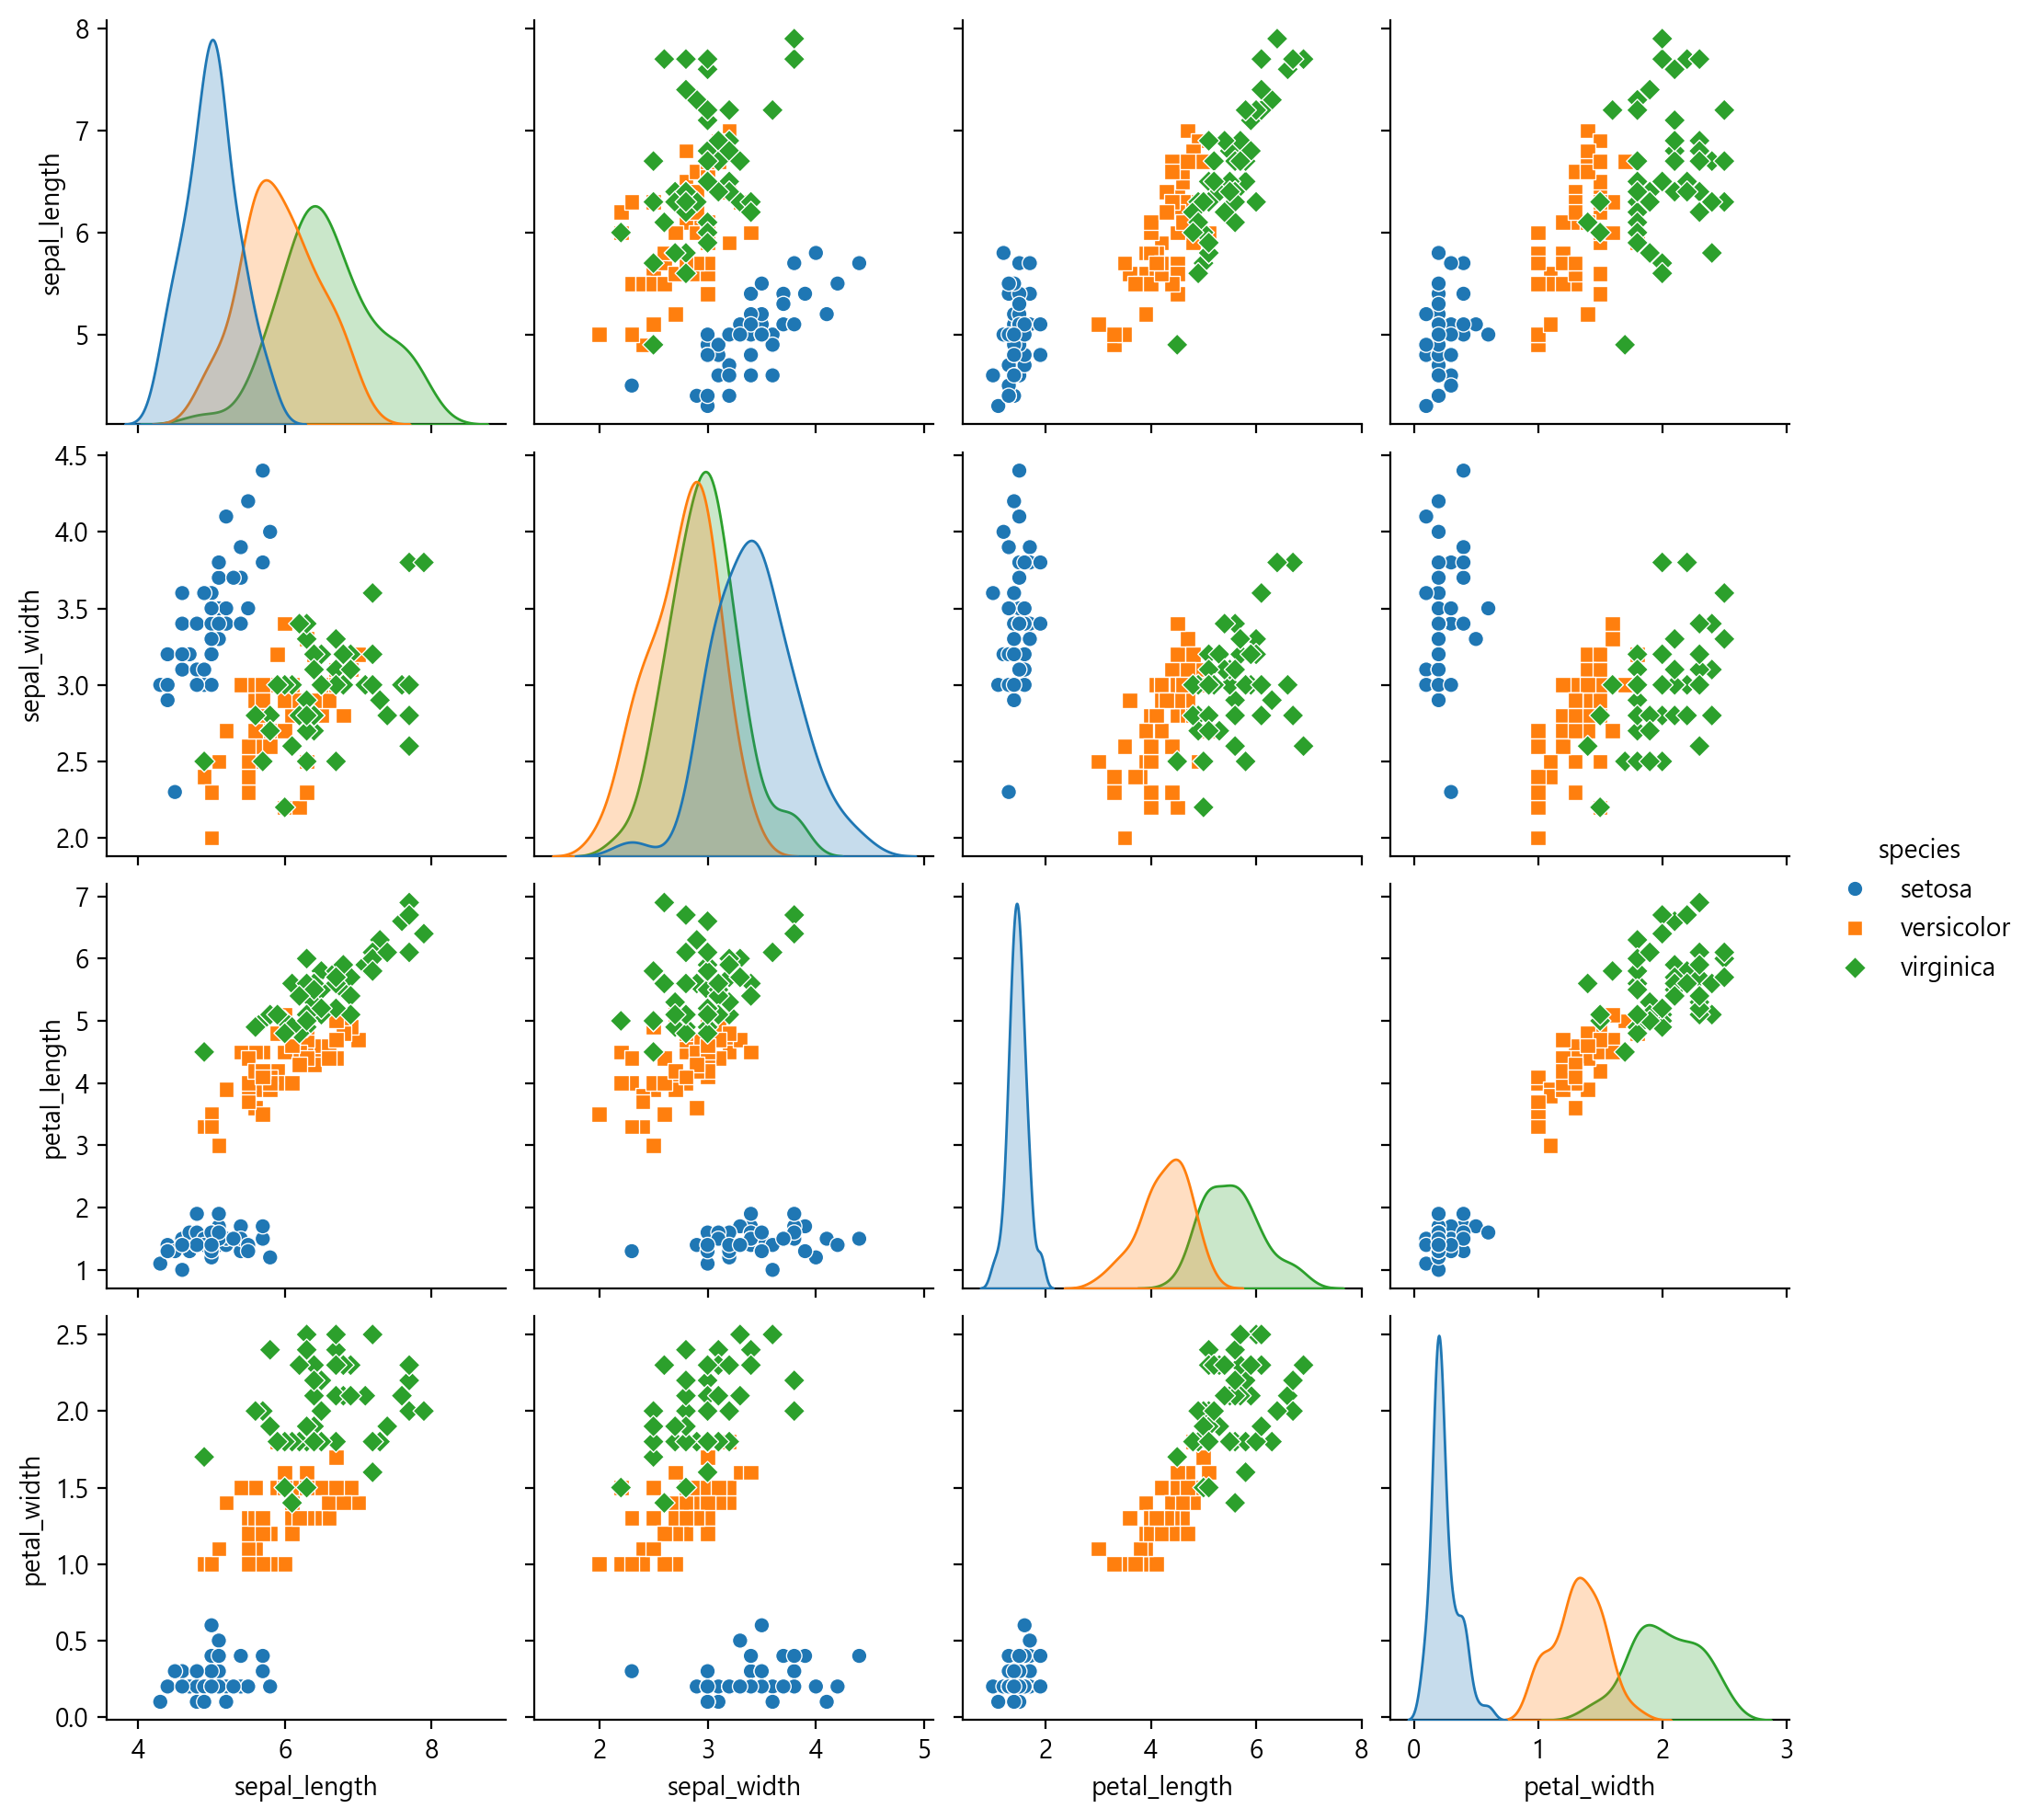

In [20]:
# 각 변수별 히스토그램
sns.pairplot(df_iris, hue='species', markers=["o", "s", "D"])
plt.show()

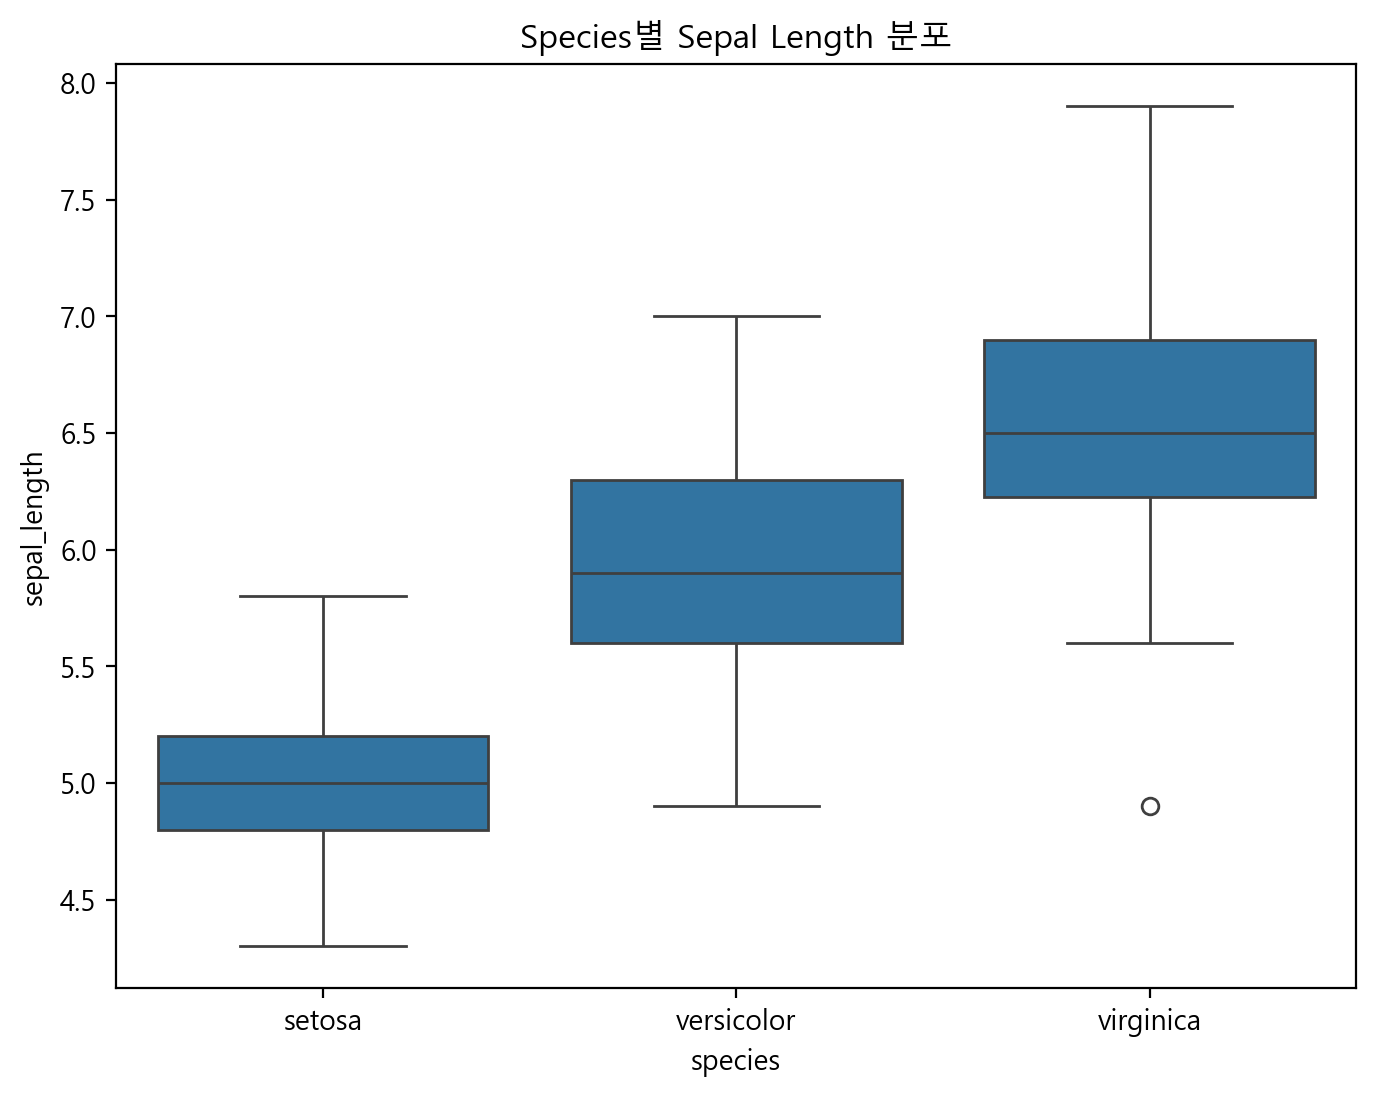

In [21]:
# species별 sepal_length 분포 확인 (박스플롯)
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df_iris)
plt.title('Species별 Sepal Length 분포')
plt.show()

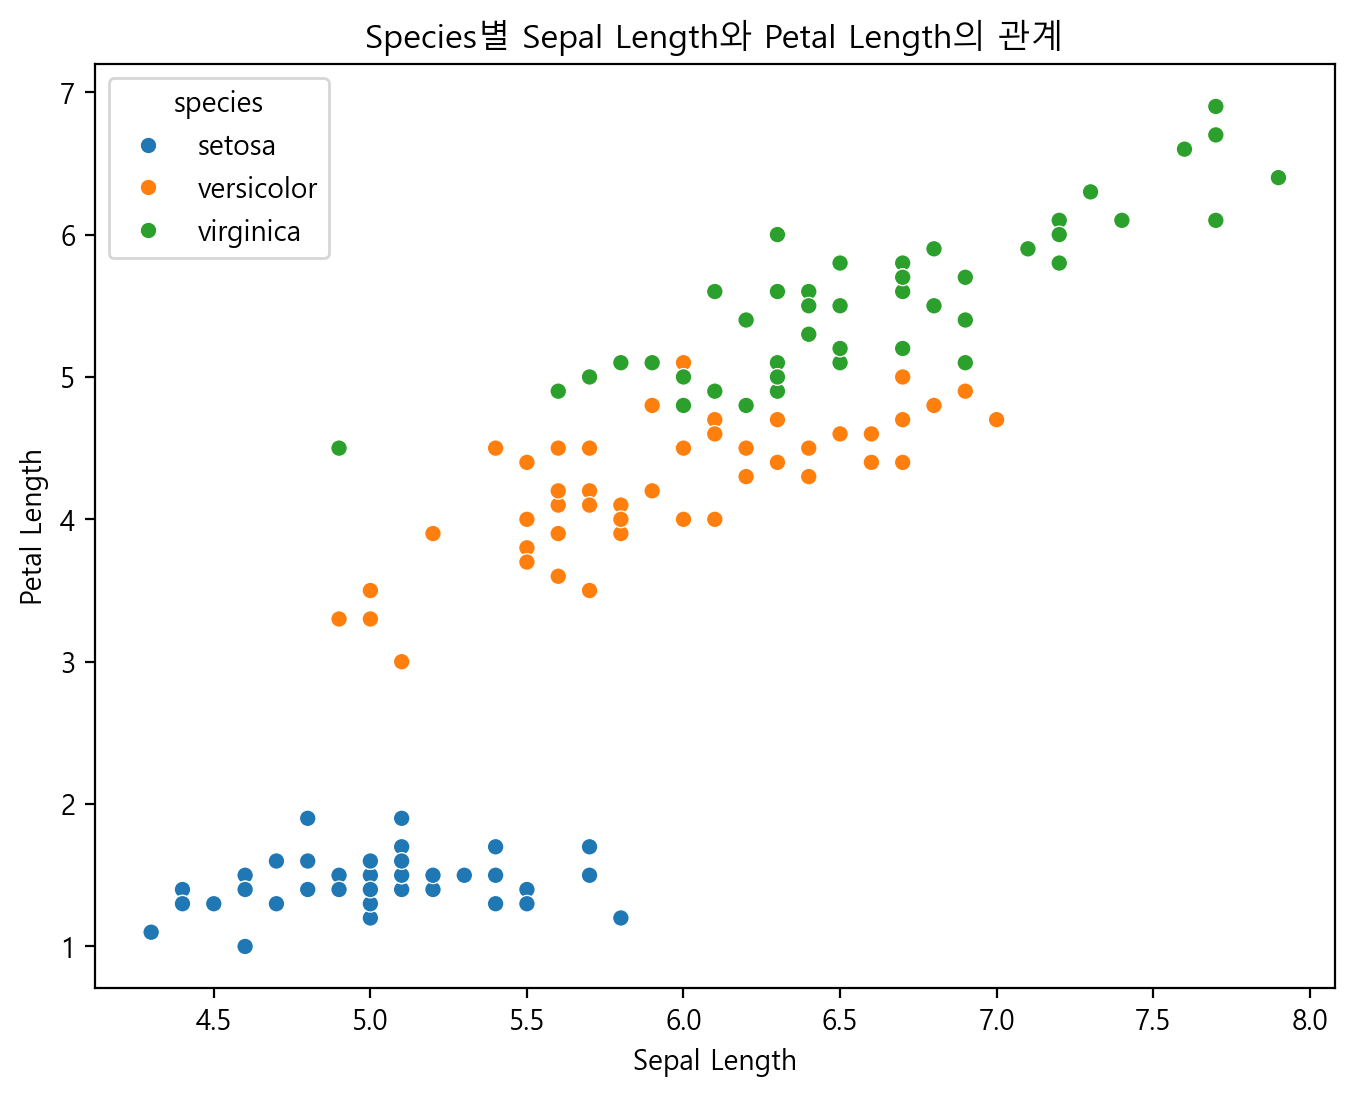

In [22]:
# 스캐터플롯
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_length', hue='species')
plt.title('Species별 Sepal Length와 Petal Length의 관계')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

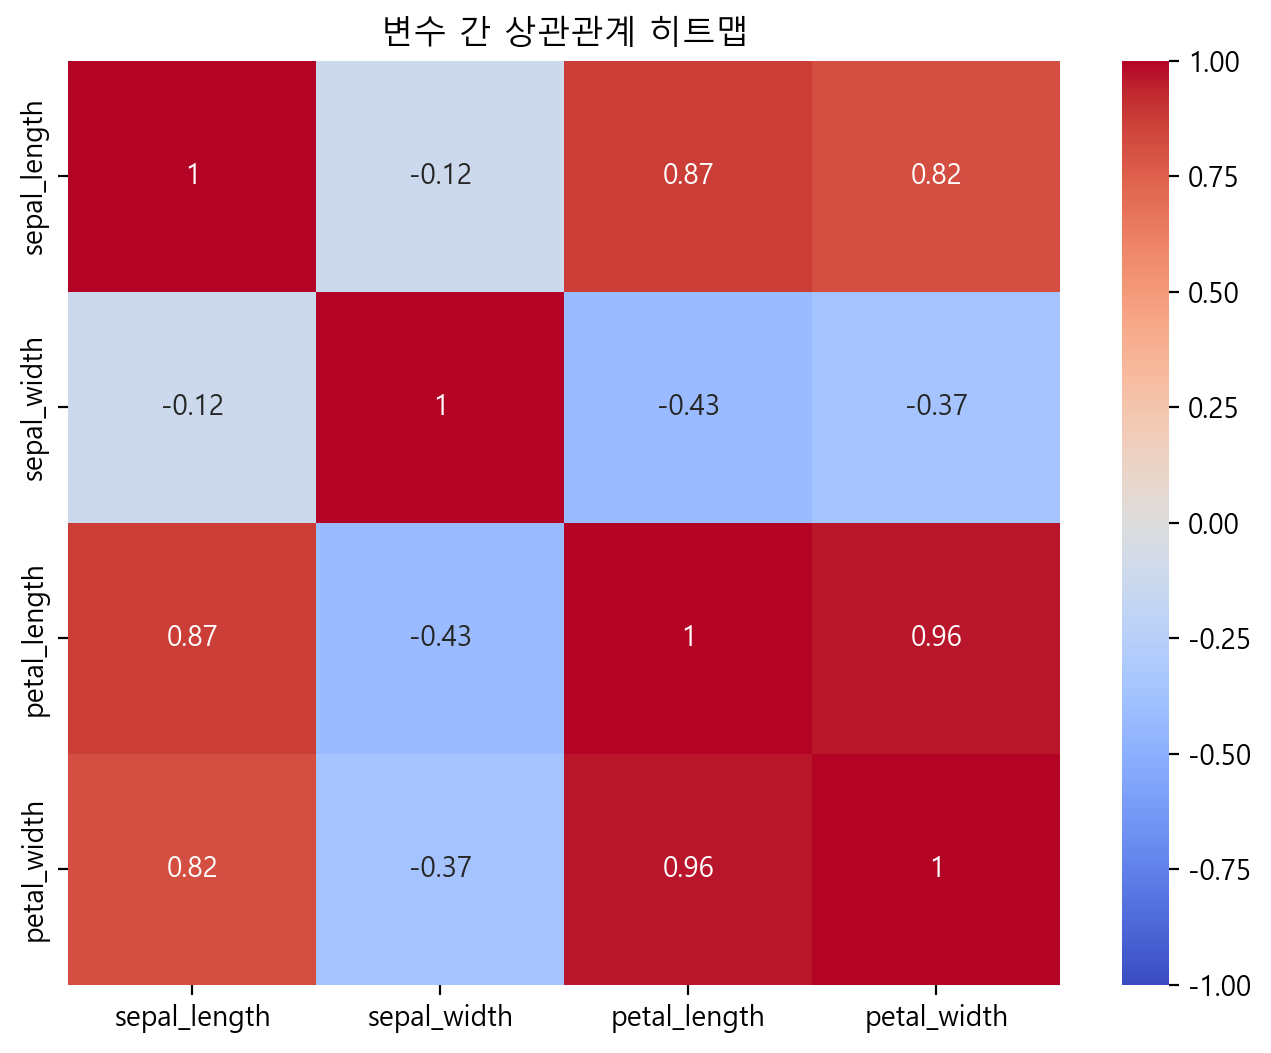

In [24]:
# 수치형 데이터만 선택하여 상관관계 행렬 계산
correlation_matrix = df_iris.select_dtypes(include=['float64', 'int']).corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('변수 간 상관관계 히트맵')
plt.show()
